In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import IBMQ
from qiskit import Aer
from qiskit import execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.visualization import plot_histogram

In [2]:
IBMQ.load_account()

/home/mk/.Tools/anaconda3_py3.7/envs/py3.7_qiskit0.23.1/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# use this function to plot measurement results
# alternatively, use plot_histogram
def visualize_counts(counts_dict, plt=plt):
    """
    take a dictionary of measurement results and
    plot it as a bar chart
    """
    N_bits = len(list(counts_dict.keys())[0])
    N_values = 2**N_bits
    
    values = [ i for i in range(N_values) ]
    labels = [ bin(i)[2:].zfill(N_bits) for i in range(N_values)]
    counts = [ counts_dict.get(label,0) for label in labels ]
    
    plt.bar(values, counts/np.sum(counts), tick_label=labels)
    plt.xlabel("measurement outcome")
    plt.ylabel("probability")
    return plt

# Defining a quantum circuit

In [4]:
# define a quantum register with 2 qubits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

In [6]:
# initialize an (empty) quantum circuit on this register
qc = QuantumCircuit(qr, cr)

In [7]:
# visualize the quantum circuit qc
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

In [11]:
# add gates to prepare a Bell state
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cnot(qr[0], qr[1])
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [ ]:
# visualize the quantum circuit qc

<hr>

# Calculating the final state vector (statevector simulation)

In [13]:
# do a statevector simultion of the circuit
backend = Aer.get_backend('statevector_simulator')
sim_statevector = execute(qc, backend)

In [15]:
# read out the state vector
results_statevector = sim_statevector.result()
print (results_statevector.get_statevector())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


<hr>

# Simulating the execution on a quantum computer (QASM simulator)

In [16]:
# measure all qubits at the end
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [17]:
# simulate the circuit on an ideal quantum computer
sim_qasm_ideal = execute(qc, Aer.get_backend('qasm_simulator'), shots=8192)

In [18]:
# display the results
results_qasm_ideal = sim_qasm_ideal.result()
print(results_qasm_ideal.get_counts())

{'00': 4107, '11': 4085}


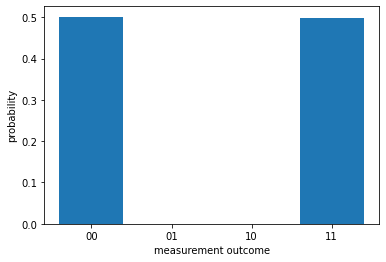

In [19]:
visualize_counts(results_qasm_ideal.get_counts()).show()

<hr>

# Simulating a realistic (noisy) quantum computer

In [20]:
# select a real quantum computer and read out its (current!) noise properties
backend = IBMQ.get_provider('ibm-q').get_backend('ibmqx2')
noise_model = NoiseModel.from_backend(backend)

In [23]:
# simulate the same circuit taking into account noise
sim_qasm_real = execute(qc, Aer.get_backend('qasm_simulator'), shots=8192, 
                        backend_properties=backend.properties(), 
                        noise_model=noise_model)

In [24]:
# display the results
results_qasm_real = sim_qasm_real.result()
print(results_qasm_real.get_counts())

{'00': 3970, '01': 257, '10': 371, '11': 3594}


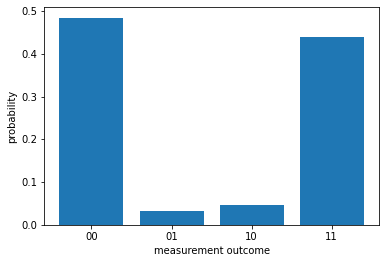

In [25]:
visualize_counts(results_qasm_real.get_counts()).show()

<hr>